In [28]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_matrix = pd.read_csv('model/data-matrix-karlgren.csv').set_index('character')

In [89]:
labels = [x for x in list(data_matrix.columns) if 'Karlgren' in x or 'tone_label' in x]
features = [x for x in list(data_matrix.columns) if x not in labels]
design_matrix = data_matrix.drop(labels, axis=1)
label_matrix = data_matrix[labels]

In [61]:
n_f, n_l = design_matrix.shape[1], label_matrix.shape[1]
heat = np.zeros((n_f, n_l))
for r in range(n_f):
    for c in range(n_l):
        heat[r][c] = design_matrix.iloc[:, r].dot(label_matrix.iloc[:, c])

In [62]:
heat.shape

(362, 110)

In [121]:
heat_df = pd.DataFrame(heat, columns=labels)
heat_df.index = features

In [184]:
cols = [x for x, y in dict(heat_df.sum() > 15000).items() if y]
tmp = heat_df[cols]

In [187]:
rows = [x for x, y in dict(tmp.sum(axis=1) > 10000).items() if y]
tmp = tmp.loc[rows]

In [191]:
tmp.shape

(11, 11)

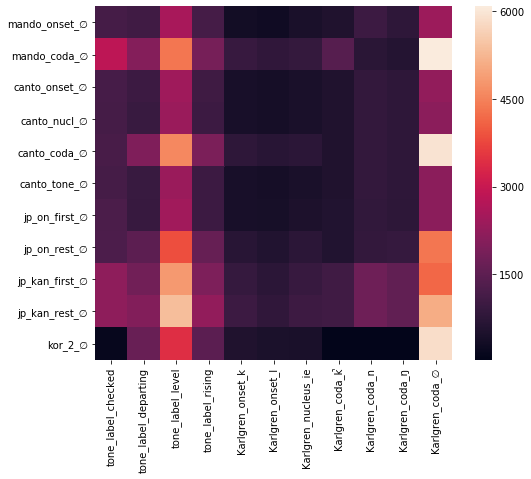

In [209]:
plt.figure(figsize=(8, 6.5))
plt.xticks(list(range(11)), cols)
ax = sns.heatmap(np.array(tmp))
ax.set_xticklabels(cols, rotation='vertical')
ax.set_yticklabels(rows, rotation='horizontal')
plt.show()

In [126]:
tmp = heat[heat[:, 0] > 200]

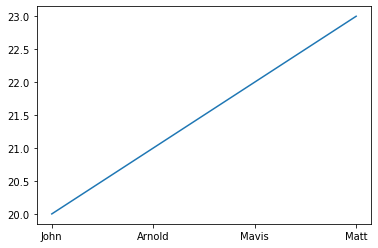

In [195]:
x = np.array([0,1,2,3])
y = np.array([20,21,22,23])
my_xticks = ['John','Arnold','Mavis','Matt']
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.show()